# Demetri Papamichalis
## ANA 500 MicroProject 4
## August 30th, 2022


### Import libraries

In [1]:
# gives current path directory
from pathlib import Path
print(Path.cwd())

C:\Users\demetri.papamichalis


In [2]:
pip install tensorflow;

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')


In [6]:
# read text file into pandas DataFrame
data= pd.read_csv("C:\\Users\demetri.papamichalis\hessi.solar.flare.2002to2016.csv")
print(data)

           flare  start.date start.time      peak       end  duration.s  \
0        2021213  2002-02-12   21:29:56  21:33:38  21:41:48         712   
1        2021228  2002-02-12   21:44:08  21:45:06  21:48:56         288   
2        2021332  2002-02-13   00:53:24  00:54:54  00:57:00         216   
3        2021308  2002-02-13   04:22:52  04:23:50  04:26:56         244   
4        2021310  2002-02-13   07:03:52  07:05:14  07:07:48         236   
...          ...         ...        ...       ...       ...         ...   
113937  16122603  2016-12-26   22:09:20  22:17:02  22:17:24         484   
113938  16122604  2016-12-26   23:25:32  23:28:18  23:43:48        1096   
113939  16122701  2016-12-27   08:33:08  08:39:06  08:39:40         392   
113940  16122702  2016-12-27   12:21:24  12:21:30  12:30:04         520   
113941  16122703  2016-12-27   12:35:40  12:37:14  12:39:00         200   

        peak.c/s  total.counts energy.kev  x.pos.asec  y.pos.asec  radial  \
0            136      

In [ ]:
# read text file into pandas DataFrame;
#data= pd.read_csv("C:\\Users\kopap\hessi.solar.flare.2002to2016.csv");
#print(df);

In [7]:
data.shape

(113942, 18)

In [17]:
data.info;

In [19]:
#check for null values
data.isnull().sum();

In [8]:
data.describe()


,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892,979.922926
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089,1350.484625
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000,0.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000,687.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000,1543.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000,9999.000000


In [21]:
#donwload file to load in excel:
#data.to_csv (r"C:\\Users\kopap\hessi.solar.flare.2002to2016.csv", index = False)

In [17]:
# Attributes list:
data.__dir__();

In [26]:
# check types of variables:
data.dtypes;


In [28]:
# show variables/columns:
data.columns;

In [30]:
# Search for "Nan" elements in dataset:
data.isnull().values.any();

In [32]:
data[data.isnull().any(axis=1)];

In [34]:
# find total number of missing values we have:
data.isnull().sum();

In [36]:
# Check for duplicates:
data.duplicated();

In [38]:
# Summary statistics:
data.describe();

# Solar flares occurence frequency (per year)

In [9]:
# date-data to be converted to year
dates = data.loc[:,'start.date']
print(dates);

0         2002-02-12
1         2002-02-12
2         2002-02-13
3         2002-02-13
4         2002-02-13
             ...    
113937    2016-12-26
113938    2016-12-26
113939    2016-12-27
113940    2016-12-27
113941    2016-12-27
Name: start.date, Length: 113942, dtype: object


In [10]:
# convert dates to only years:
years = pd.to_datetime(data['start.date']).dt.year
print(years);

0         2002
1         2002
2         2002
3         2002
4         2002
          ... 
113937    2016
113938    2016
113939    2016
113940    2016
113941    2016
Name: start.date, Length: 113942, dtype: int64


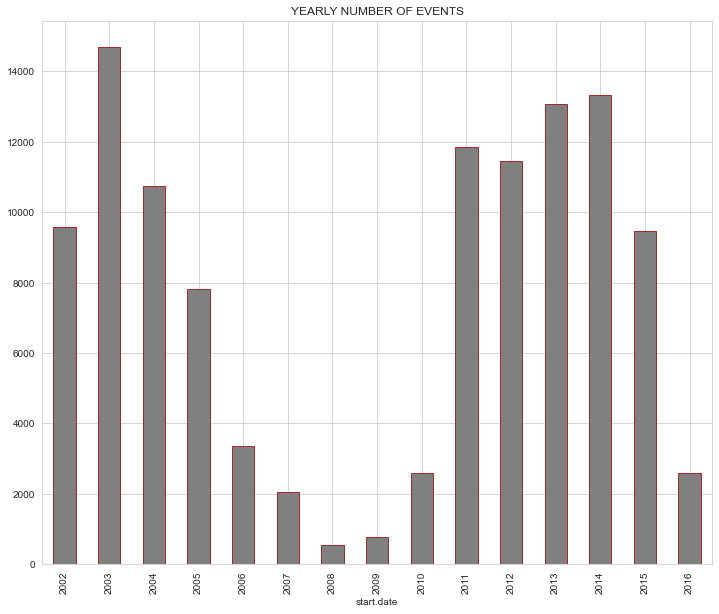

In [11]:
data.groupby([years])['total.counts'].count().plot(kind='bar',figsize=(12,10),color="grey",edgecolor="brown",title='YEARLY NUMBER OF EVENTS')
plt.show()

In [55]:
#extract flare counts

In [12]:
#like this....
counts0 = data['total.counts'];
print(counts0);

0         167304
1           9504
2          11448
3          17400
4         313392
           ...  
113937     75328
113938    142048
113939     32344
113940     17336
113941     11056
Name: total.counts, Length: 113942, dtype: int64


In [13]:
# or like this...
counts = data.loc[:,'total.counts']
print(counts);

0         167304
1           9504
2          11448
3          17400
4         313392
           ...  
113937     75328
113938    142048
113939     32344
113940     17336
113941     11056
Name: total.counts, Length: 113942, dtype: int64


In [14]:
# Let's make sure 'date' is actually a date in pandas
data["start.date"] = pd.to_datetime(data["start.date"])

In [15]:
date = data["start.date"]

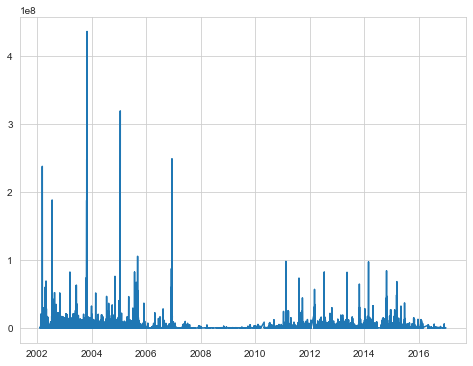

In [16]:
# time series in full dates
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, counts);

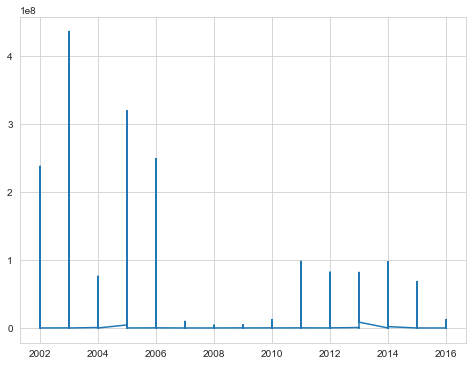

In [17]:
# time series in years only (no months, days)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(years, counts);

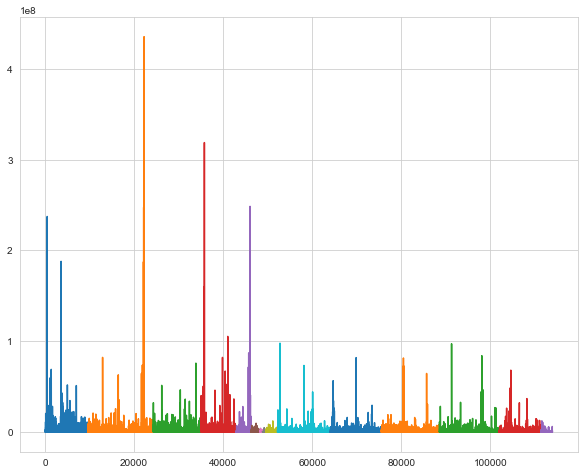

In [18]:
from matplotlib import pyplot
counts.groupby([years]).plot(figsize=(10, 8));
pyplot.show();

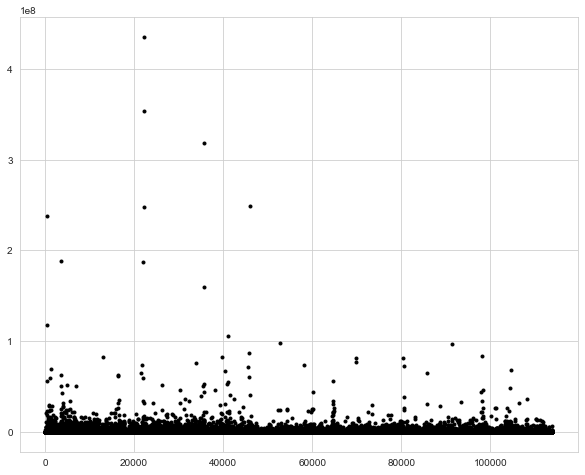

In [19]:
counts.groupby([years]).plot(style='k.',figsize=(10, 8))
pyplot.show()


In [20]:

my_path = 'C:\\Users\demetri.papamichalis'
fname = os.path.join(my_path, "hessi.solar.flare.2002to2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5']
113943


In [21]:
counts = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))

Compute the number of samples for each data split

In [22]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(counts) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 56971
num_val_samples: 28485
num_test_samples: 28487


Normalize data

In [23]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)+0.000001
raw_data /= std

In [24]:
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


# Instantiate datasets for training, validation and test

In [25]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=counts[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=counts[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=counts[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

output for a dataset

In [26]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 17)
targets shape: (256,)


### Compute a common-sense baseline

In [27]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 0.00
Test MAE: 0.00


## 1) Machine-learning model

### train and evaluate model

In [31]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [keras.callbacks.ModelCheckpoint("solar_flare.keras",save_best_only=True)]

opt = keras.optimizers.Adam(0.001, clipnorm=1)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=opt)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("solar_flare.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
220/220 [==============================] - 3s 12ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/10
220/220 [==============================] - 2s 11ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 3/10
220/220 [==============================] - 2s 11ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 4/10
220/220 [==============================] - 3s 12ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 5/10
220/220 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 6/10
220/220 [==============================] - 3s 12ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 7/10
220/220 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - 

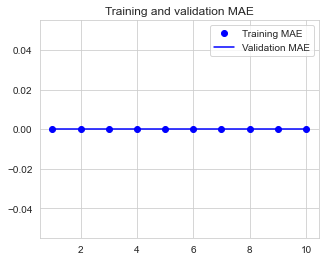

In [29]:
# plot results
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 2) 1D convolutional model

In [32]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("hessi.solar.flare.2002to2016",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("hessi.solar.flare.2002to2016")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
219/220 [============================>.] - ETA: 0s - loss: 0.0000e+00 - mae: 0.0000e+00

INFO:tensorflow:Assets written to: hessi.solar.flare.2002to2016\assets


INFO:tensorflow:Assets written to: hessi.solar.flare.2002to2016\assets


220/220 [==============================] - 17s 69ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/10
220/220 [==============================] - 11s 48ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 3/10
220/220 [==============================] - 11s 51ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 4/10
220/220 [==============================] - 10s 46ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 5/10
220/220 [==============================] - 11s 48ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 6/10
220/220 [==============================] - 10s 47ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 7/10
220/220 [==============================] - 10s 43ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_

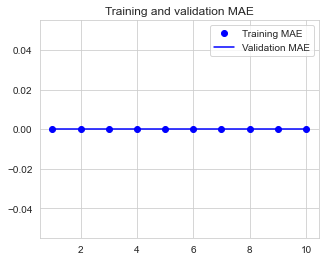

In [33]:
# plot results
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### LSTM - based model

In [34]:
inputs = keras.Input(shape=(sequence_length, counts.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("hessi.solar.flare.2002to2016",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("hessi.solar.flare.2002to2016")

Epoch 1/10


ValueError: in user code:

    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 120, 113943), found shape=(None, None, 17)


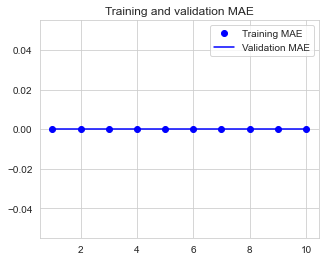

In [35]:
# plot results
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Recurrent Nural Network

In [36]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 16)


In [37]:
# Stacked RNN Layers
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

### Train and evalueate a dropout-regularized, stacked GRU model


In [38]:
inputs = keras.Input(shape=(sequence_length, counts.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
  
callbacks = [
    keras.callbacks.ModelCheckpoint("hessi.solar.flare.2002to2016.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("hessi.solar.flare.2002to2016.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


ValueError: in user code:

    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\demetri.papamichalis\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 120, 113943), found shape=(None, None, 17)


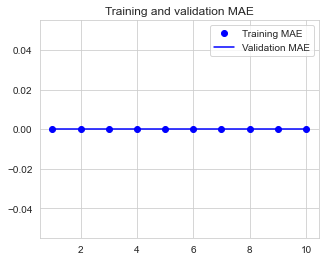

In [39]:
# plot results
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()